In [103]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
import json
from pandas.io.json import json_normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

## Read in preprocessed data

In [104]:
X_train = pd.read_csv('train_dataset.csv', sep = '\t', index_col = 0).drop('cuisine', axis = 1) 
# Drop the cuisine label to perform PCA - but we will need it for the cuisine popularity plot
cuisines = pd.read_csv('train_dataset.csv', sep = '\t', usecols = ['cuisine'])
cuisines.set_index(X_train.index, inplace = True)

In [105]:
print("Number of recipes: %i, number of ingredients: %i" % (X_train.shape[0], X_train.shape[1]))

Number of recipes: 37340, number of ingredients: 267


## PCA

In [106]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'navy', 'turquoise', 'darkorange', 'black', 'coral', 'fuchsia', 'lightblue', 'grey', 'lavender', 'plum', 'tan', 'teal', 'violet', 'salmon', 'darkgreen']

In [107]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_train.iloc[:, :-2])

In [108]:
print('explained variance ratio (5 components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (5 components): [0.04267517 0.02940534 0.02490412 0.02247389 0.02080541]


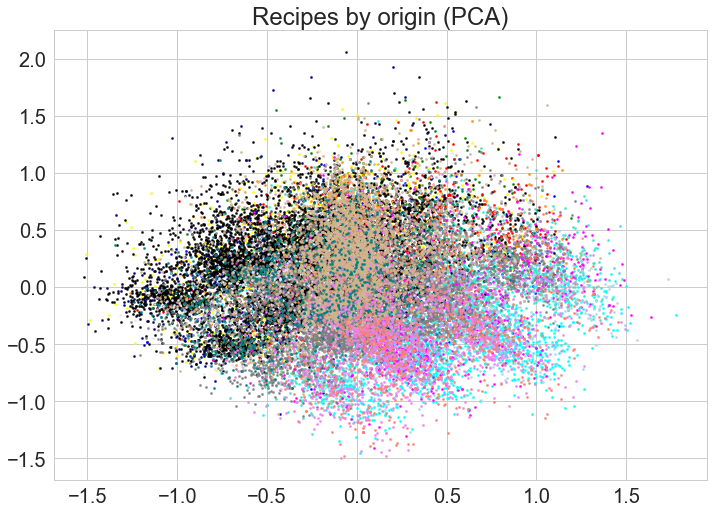

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin (PCA)")
for i, cur_origin in enumerate(np.unique(cuisines)):
    plt.scatter(X_pca[(cuisines == cur_origin)['cuisine'], 1], X_pca[(cuisines == cur_origin)['cuisine'], 2], 
                c = colors[i], label = cur_origin, s = 5)
plt.savefig("pca.png")

## t-SNE

In [ ]:
# tSNE takes ~50mins on the original dataset

pca = PCA(n_components=5)
X = pca.fit_transform(X_train.iloc[:, :-2])  
tsne = TSNE(n_components = 2, perplexity = 15, early_exaggeration = 30)
X_tsne = tsne.fit_transform(X)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin (t-SNE)")
for i, cur_origin in enumerate(np.unique(cuisines)):
    plt.scatter(X_tsne[(cuisines == cur_origin)['cuisine'], 0], X_tsne[(cuisines == cur_origin)['cuisine'], 1], 
                c = colors[i], label = cur_origin, s = 5)

plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.savefig("results/t-sne_plot.png")
plt.show()

## Original code

In [110]:
X_train['cuisine'] = np.array(cuisines) # Add the cuisine label to group the recipes

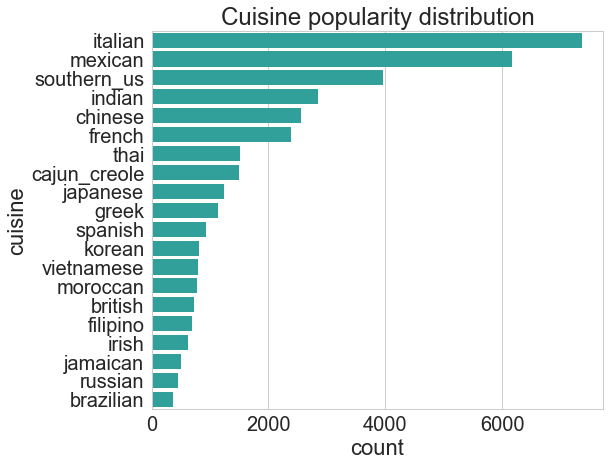

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)

cuisine_counts = X_train.groupby('cuisine').cuisine.count()
cuisine_counts = pd.DataFrame({'cuisine': cuisine_counts.index, 'count': cuisine_counts.values})
cuisine_counts = cuisine_counts.sort_values(['count'], ascending=False)
sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.title("Cuisine popularity distribution")

_ = sns.barplot(ax=ax, x='count', y='cuisine', data=cuisine_counts, orient='h', label='big', color='lightseagreen')
plt.tight_layout()
# setting the dpi parameter solved the problems with alignment in Latex
fig.savefig('cuisine_popularity.pdf', dpi=200) 

In [113]:
X_train = X_train.drop('cuisine', axis=1)
X_transposed = X.transpose()
X_transposed['frequency'] = X_transposed.sum(axis=1) # frequency of ingredients

In [114]:
# 10 most frequent ingredients
X_transposed.sort_values('frequency', ascending=False).head(10)

,10259,25693,20130,13162,6602,42779,3735,16903,12734,5875,...,6153,25557,24348,7377,29109,11462,2238,41882,2362,frequency
onions,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,8384
olive,0,0,0,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,7920
sugar,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,7681
garlic,1,0,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,7478
garlic_cloves,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6205
tomatoes,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5366
butter,0,0,1,1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,5137
pepper,1,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,0,4985
pepper_ground_black,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,4760
allpurpose_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4563


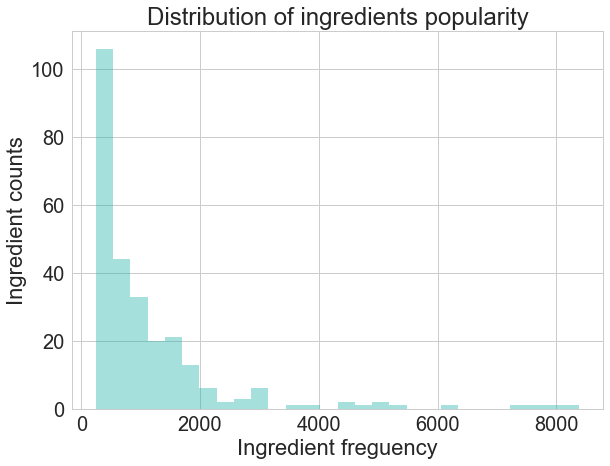

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)

plt.title("Distribution of ingredients popularity")
ax = sns.distplot(X_transposed['frequency'], kde=False, label="big", color='lightseagreen')
ax.set(xlabel='Ingredient freguency', ylabel='Ingredient counts')
plt.tight_layout()
fig.savefig('ingredients_popularity.pdf', dpi=200)

In [116]:
X_train["number_of_ingredients"] = X.iloc[:, :-2].sum(axis=1) # Recipe length

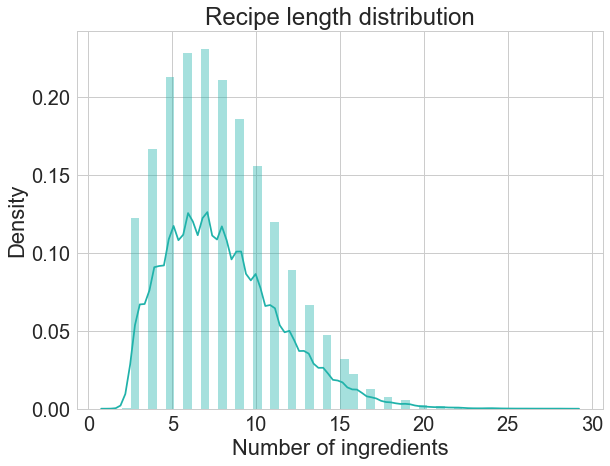

In [117]:
# Recipe length distribution

fig, ax = plt.subplots()
fig.set_size_inches(9, 7)

plt.title("Recipe length distribution")
ax = sns.distplot(X_train['number_of_ingredients'], kde=True, label="big",color='lightseagreen')
ax.set(xlabel='Number of ingredients', ylabel='Density')
plt.tight_layout()
fig.savefig('recipes_length.pdf', dpi=200)

In [121]:
kurt = X_train['number_of_ingredients'].kurtosis() 
skew = X_train['number_of_ingredients'].skew()
print("Kurtosis: %f, Skewness: %f" % (kurt, skew))

Kurtosis: 0.759405, Skewness: 0.814908


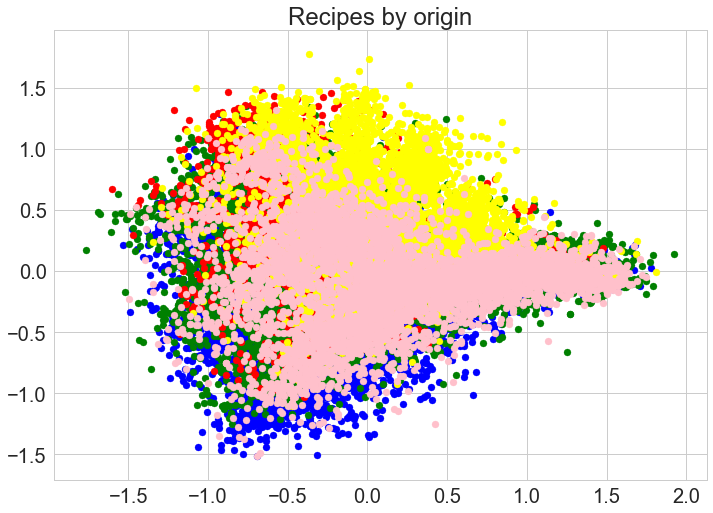

In [127]:
# Attempts at clustering by origin
# - similarly to https://lib.ugent.be/fulltxt/RUG01/002/166/653/RUG01-002166653_2014_0001_AC.pdf


X_train = pd.read_csv('train_dataset.csv', sep = '\t', index_col = 0) # Read data with the cuisine label

west = ['french', 'irish', 'british', 'russian', 'cajun_creole'] 
east = ['chinese', 'vietnamese', 'japanese', 'filipino', 'korean', 'thai']
south = ['southern_us', 'jamaican', 'mexican', 'brazilian']
mediterranean = ['greek', 'spanish', 'italian', 'moroccan']
indian = ['indian']

def label_origin(row):
    if row['cuisine'] in west:
        return 'west'
    if row['cuisine'] in east:
        return 'east'
    if row['cuisine'] in mediterranean:
        return 'mediterranean'
    if row['cuisine'] in indian:
        return 'indian'
    if row['cuisine'] in south:
        return 'south'

X_train['origin'] = X_train.apply (lambda row: label_origin(row),axis=1)

    
colors = ['blue', 'green', 'red', 'yellow', 'pink']
origins = X_train['origin'].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.iloc[:, :-3])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin")
for i, cur_origin in enumerate(set(origins)):
    plt.scatter(X_pca[origins == cur_origin, 0], X_pca[origins == cur_origin, 1], c=colors[i])

fig.savefig('pca_origins.pdf')

### Interpretation: 2 first PCA components aren't enough to represent the data 
# (explained variance ratio (first two components): [0.0298653  0.02821523])

In [136]:
transposed = X_train.transpose()
ingredients = transposed.index.values # Ingredient names for annotations

In [140]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(transposed)

In [141]:
df = pd.DataFrame(X_pca, index=ingredients, columns=['x', 'y'])

In [142]:
df.head() # Example of PCA-reduced representation of ingredients

,x,y
active_dry_yeast,-4.226206,1.879728
allpurpose_flour,12.320878,37.648667
avocado,-0.005403,-4.082855
bacon,-0.222044,-0.268056
baguette,-4.211268,-1.204704


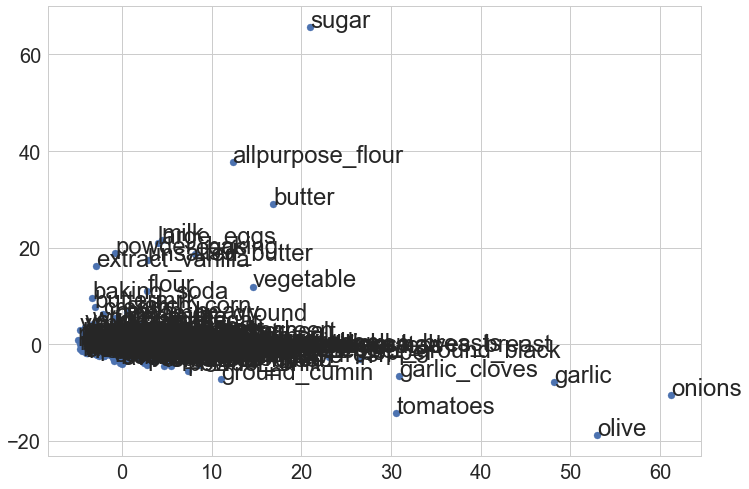

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)

# Not interpretable for all of the ingredients
#fig.savefig("PCA.pdf")   

In [152]:
transposed['count'] = transposed.sum(axis=1)
transposed = transposed.sort_values('count', ascending=False)
top30_ingredients = transposed[:30]
top30_names = top30_ingredients.index.values

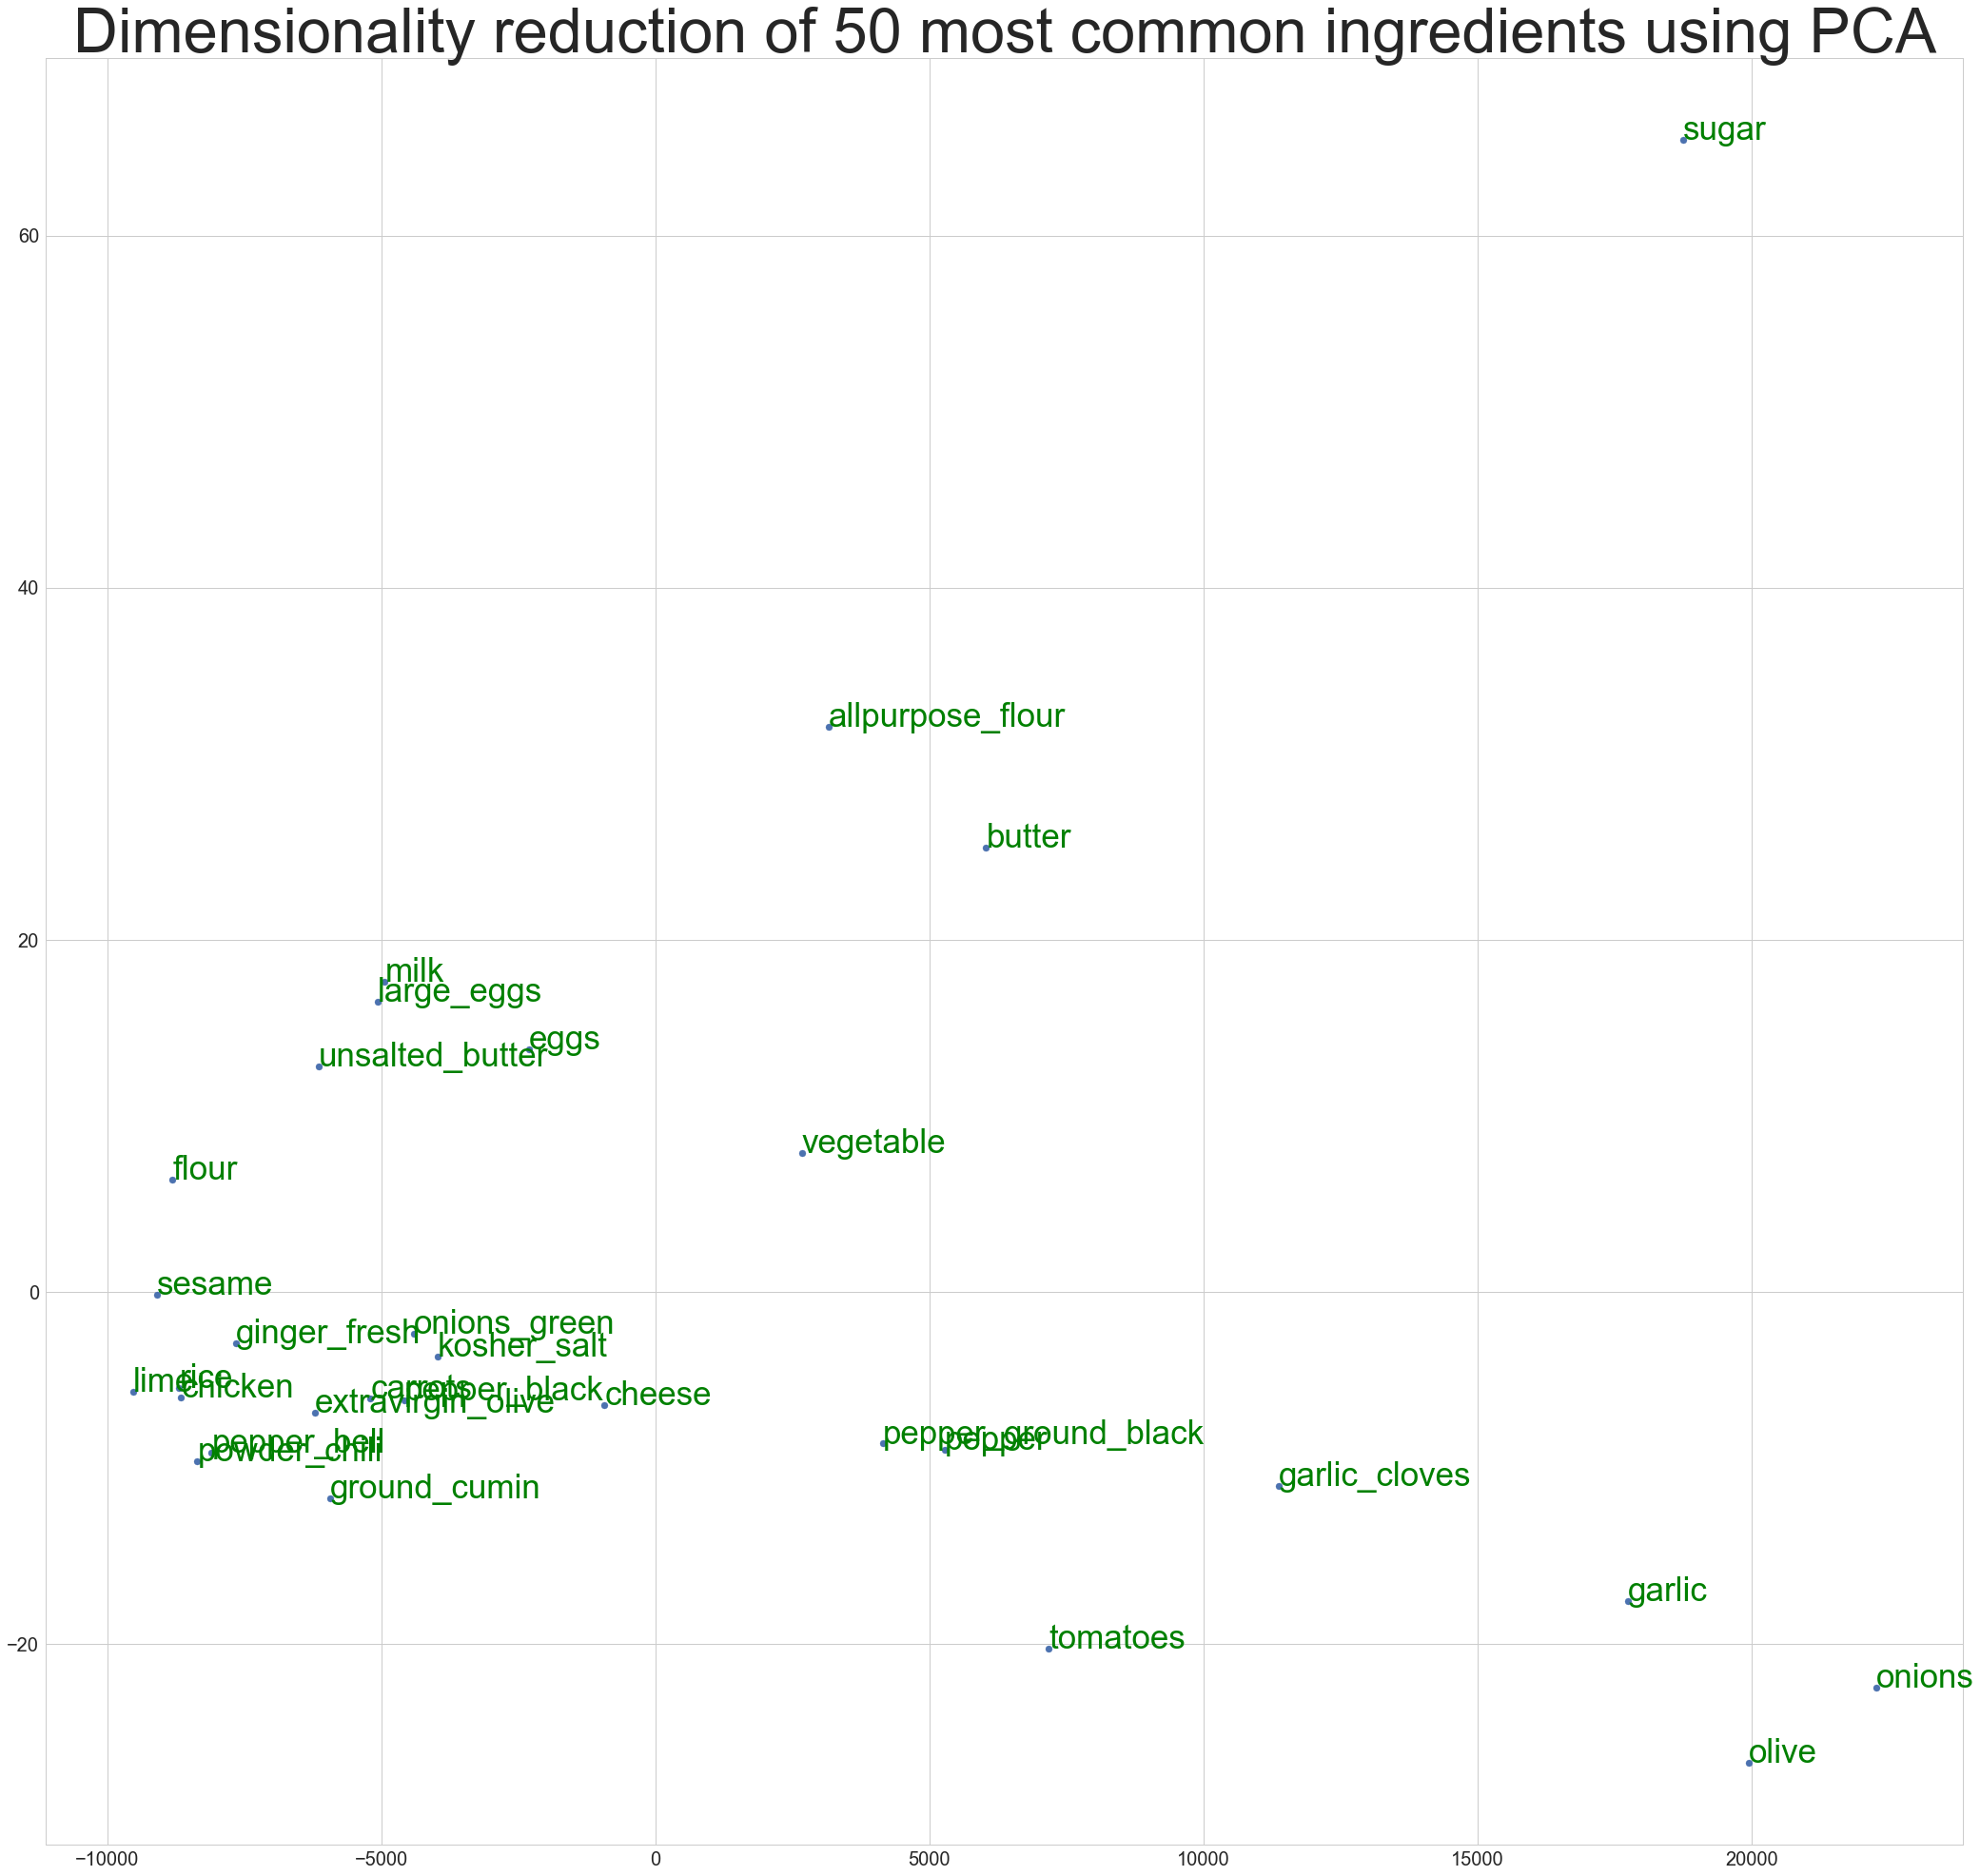

In [153]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(top30_ingredients)


df = pd.DataFrame(X_pca, index=top30_names, columns=['x', 'y'])
fig, ax = plt.subplots()
fig.set_size_inches(31.7, 28.27)
sns.set(font_scale=3)
sns.set_style("whitegrid")
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos, color='green', fontsize=35)
    
plt.title("Dimensionality reduction of 50 most common ingredients using PCA", fontsize=65) 
plt.tight_layout()
fig.savefig("PCA.pdf")   

"|  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high.""

In [154]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X = svd.fit_transform(X_train.iloc[:50, :-1])  

In [ ]:
names = X_train.iloc[:50, :-1].index.values

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [ ]:
X_tsne.head()

In [ ]:
df_tsne = pd.DataFrame(X_tsne, index=names, columns=['x', 'y'])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(31.7, 28.27)
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax.scatter(df_tsne['x'], df_tsne['y'])
for word, pos in df_tsne.iterrows():
    ax.annotate(word, pos, color='green')
    
plt.title("Dimensionality reduction of 50 most common ingredients using Truncated SVD and tSNE")   
plt.tight_layout()
fig.savefig("tSNE.pdf")   

In [ ]:
X_train['name'] = X_train.index.values

In [ ]:
X_train